In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [11]:
master_df = pd.read_csv(r"C:\Users\USER\Desktop\Jupyter Notebook\Stelco\new_class_division_coils.csv")

In [4]:
# # Identify features: all columns ending with '_calculated_value'
# feature_cols = [col for col in master_df.columns if col.endswith('_calculated_value')]

# # Remove any column where ALL values are 0 or ALL are -99.99
# drop_cols = []
# for col in feature_cols:
#     col_values = master_df[col].values
#     if np.all(col_values == 0) or np.all(col_values == -99.99):
#         drop_cols.append(col)

# # Actually drop those columns
# x_features = [col for col in feature_cols if col not in drop_cols]
# print("Dropped columns:", drop_cols)
# print("Remaining features for modeling:", x_features)

Dropped columns: ['S4 Operating Bending Trim_calculated_value', 'Stand 4 Gap Thread Offset_calculated_value']
Remaining features for modeling: ['X4 Gauge Deviation_calculated_value', 'Master Ramp_calculated_value', 'Stand 1 Gap Operator Offset_calculated_value', 'Stand 2 Gap Operator Offset_calculated_value', 'Stand 3 Gap Operator Offset_calculated_value', 'Stand 4 Gap Operator Offset_calculated_value', 'S1 Operating Bending Trim_calculated_value', 'S2 Operating Bending Trim_calculated_value', 'S3 Operating Bending Trim_calculated_value', 'X0 Gauge Deviation_calculated_value', 'X1 Gauge Deviation_calculated_value', 'Stand 1-2 Tension Reference_calculated_value', 'Stand 2-3 Tension Reference_calculated_value', 'Stand 3-4 Tension Reference_calculated_value', 'Stand 1-2 Total Tension Feedback_calculated_value', 'Stand 2-3 Total Tension Feedback_calculated_value', 'Stand 3-4 Total Tension Feedback_calculated_value', 'Exit Tension Reel Tension Reference_calculated_value', 'Tension Reel Calc

In [3]:
# Find classes with o<=5 sample
vc = master_df['class_string'].value_counts()
rare_classes = vc[vc <= 15].index

print("Classes with <=15 sample:", list(rare_classes))
# Remove them
df_filtered = master_df[~master_df['class_string'].isin(rare_classes)].copy()
print("Filtered dataframe shape:", df_filtered.shape)

Classes with <=15 sample: ['HMMMH', 'MMLLL', 'LLLMM', 'MLMMH', 'HLMMM', 'HMMHH', 'LLMMM', 'MHMMM', 'HLMLM', 'MMLHM', 'MLLMH', 'LLMLM', 'MMHMM', 'LMLMM', 'HMLLM', 'LLLML', 'MLLLH', 'LLMLL', 'HMMLM', 'MMMLL', 'HMLMH', 'LMMMM', 'LMLML', 'MLHLM', 'MHLMM', 'MMLMH', 'MLHMM', 'HMMHM', 'MMMLH', 'MLMLH', 'MLMHM', 'LMLLL', 'HMHMH', 'HLMHM', 'HLMLL', 'HLMMH', 'HLHMM', 'HLLMH', 'MMMHH', 'HMHMM', 'HLLLL', 'HLLML', 'MHLHM', 'HMLML', 'MLLHM', 'HLMML', 'LMMML', 'MLMHH', 'HHMMM', 'HLMHH', 'LMMLL', 'HHMHH', 'MMHLM', 'HHLMM', 'HLMLH', 'MMLLH', 'HHHHH', 'HHLHM', 'MLHMH', 'MMHMH', 'LLMML', 'LHLMM', 'HHMLH', 'HHLLM', 'HLHLH', 'HMMLH', 'LMMHL', 'MHLLM', 'HMHLM', 'MMMHL', 'MLHLH', 'MHMMH', 'LLLLH', 'HMHML', 'MMLHH', 'MMHHM', 'HHHMM', 'MLHLL', 'MHHHM', 'HMMML', 'HLHLM', 'LMMLM', 'HMLHM', 'LMLHM', 'MHLHH', 'HHLLH', 'HLLLH', 'LLHML', 'LHLML', 'LMMHM', 'MMHML', 'LHHLM', 'HHMHM', 'HHMMH', 'MHMHM']
Filtered dataframe shape: (2250, 2)


In [12]:
# Find classes with o<=5 sample
vc = master_df['class_string'].value_counts()
# rare_classes = vc[vc <= 15].index

# print("Classes with <=15 sample:", list(rare_classes))
# Remove them
df_filtered = master_df.copy()
# print("Filtered dataframe shape:", df_filtered.shape)
print(df_filtered['class_string'].value_counts())

class_string
MLLLM    416
MMMMM    308
MLLMM    305
MMLMM    210
MLMMM    158
        ... 
MMHML      1
LHHLM      1
HHMHM      1
HHMMH      1
MHMHM      1
Name: count, Length: 118, dtype: int64


In [13]:
df_filtered

,Coil ID,class_string
0,5479791,MMLLM
1,5445265,MLMLM
2,5452912,MLMMM
3,5466982,MLMLM
4,5471371,LLLLM
...,...,...
2678,5490073,MMMLM
2679,5501049,HLLLM
2680,5440350,MLLMM
2681,5475503,MLMLM


In [15]:
counts_series = df_filtered['class_string'].value_counts()

# Convert the Series to a DataFrame
counts_df = counts_series.reset_index()

# Rename the columns
counts_df.columns = ['class_label', 'no of samples']

# print(counts_df)
# Save to CSV
counts_df.to_csv('class_labels_counts.csv', index=False)

In [6]:
len(rare_classes)

95

In [4]:
len(vc)

118

In [5]:
vc.value_counts()

count
1      35
2      11
4      10
7       7
8       7
10      6
3       4
11      3
13      3
21      2
102     2
9       2
5       2
12      2
37      2
305     1
308     1
416     1
210     1
20      1
22      1
23      1
26      1
28      1
27      1
53      1
47      1
144     1
158     1
59      1
65      1
15      1
19      1
14      1
6       1
Name: count, dtype: int64

In [9]:
df_filtered['class_string'].value_counts()

class_string
MLLLM    416
MMMMM    308
MLLMM    305
MMLMM    210
MLMMM    158
MMLLM    144
MLMLM    102
MLLLL    102
HMMMM     65
MMMLM     59
LLLLM     53
MLLML     47
LLLLL     37
MMLML     37
MMMML     28
MMMHM     27
HLLLM     26
MLMLL     23
MLMML     22
MMMMH     21
HMLMM     21
HLLMM     20
LMLLM     19
Name: count, dtype: int64

In [6]:
X = df_filtered[x_features]
y = df_filtered['class_string']

# Encode y (because it's a string like "HHLHL"), use sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split train/test (70/30 split, random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [34]:
print(X.shape)

(2897, 95)


In [35]:
print(y.shape)

(2897,)


In [7]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([  13,   30,  176,   22,   21,   38,   57, 1670]))

In [8]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([  6,  13,  76,  10,   9,  16,  24, 716]))

In [10]:
# XGBoost can handle multiclass natively
clf = XGBClassifier(
    n_estimators=113,
    max_depth=3,
    learning_rate=0.13312820438128978,
    subsample=0.9173953855049505,
    colsample_bytree=0.6093189324139895,
    gamma=0.780254120577378,
    reg_alpha=0.6574622292293312,   # alpha → reg_alpha
    reg_lambda=4.418421467097197,   # lambda → reg_lambda
    random_state=42,
    eval_metric='mlogloss'          # Reproducibility
)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6093189324139895, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=0.780254120577378, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13312820438128978,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=113, n_jobs=None,
              num_parallel_tree=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

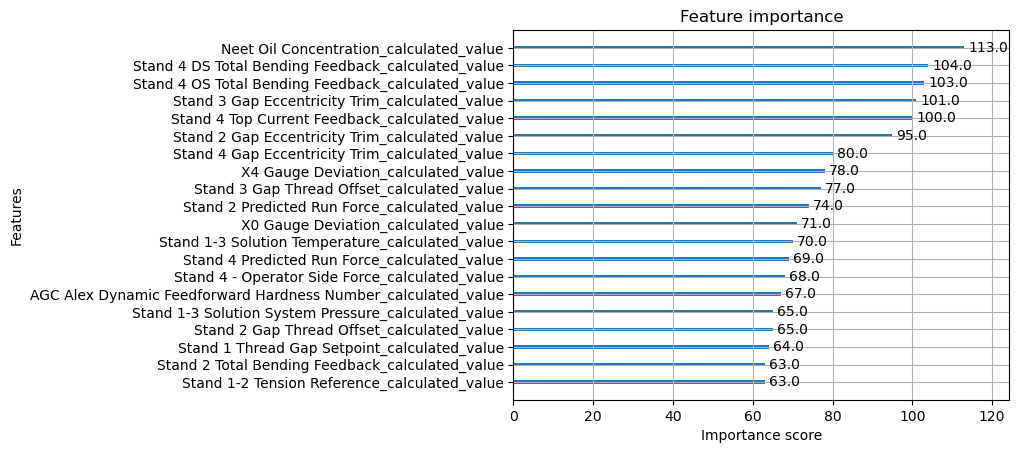

In [20]:
xgb.plot_importance(clf,max_num_features=20)

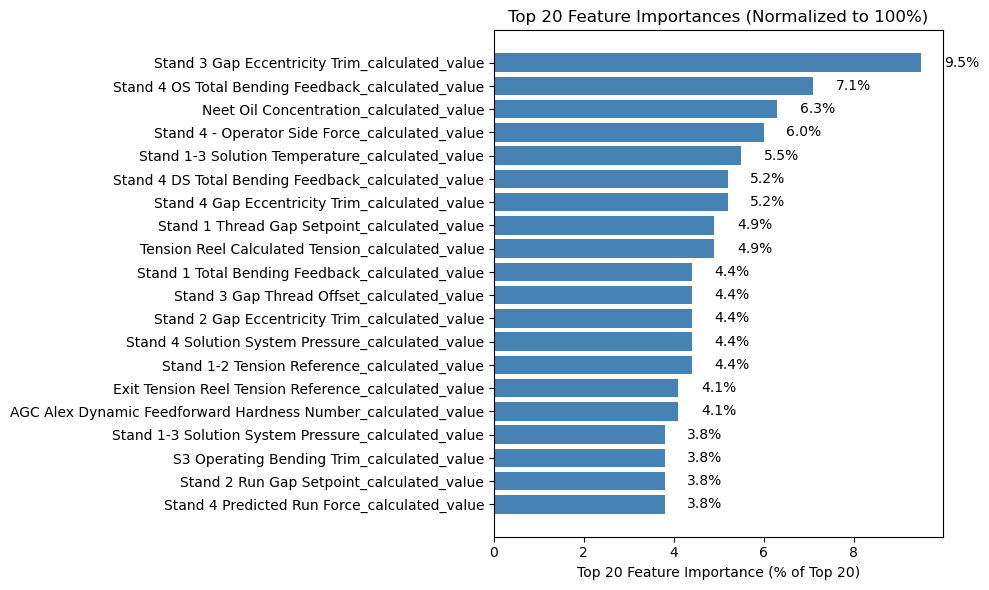

In [51]:
# Step 1: Raw importance, as before
raw_importance = clf.get_booster().get_score(importance_type='weight')  # or 'gain', 'cover'
df_imp = pd.DataFrame.from_dict(raw_importance, orient='index', columns=['Importance'])
df_imp['Importance'] = df_imp['Importance'].astype(float)

# Step 2: Sort and select top 20
df_top20['Importance (%)'] = 100 * df_top20['Importance'] / df_top20['Importance'].sum()
# Round for display
df_top20['Importance (%)'] = df_top20['Importance (%)'].round(1)

# Adjust largest value (or last bar) so total is exactly 100%
total = df_top20['Importance (%)'].sum()
diff = 100.0 - total
if abs(diff) > 0 and len(df_top20) > 0:
    i_max = df_top20['Importance (%)'].idxmax()
    df_top20.at[i_max, 'Importance (%)'] += diff

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.barh(df_top20.index[::-1], df_top20['Importance (%)'][::-1], color='steelblue')
for index, value in enumerate(df_top20['Importance (%)'][::-1]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')
plt.xlabel("Top 20 Feature Importance (% of Top 20)")
plt.title("Top 20 Feature Importances (Normalized to 100%)")
plt.tight_layout()
plt.show()

In [11]:
y_train

array([7, 7, 7, ..., 7, 7, 7])

In [11]:
# Predict
y_pred = clf.predict(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

# Optional: Show full classification report for all classes
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy:  0.833
Precision: 0.778
Recall:    0.833
F1 Score:  0.772

Classification report:

              precision    recall  f1-score   support

       HLLHL       0.00      0.00      0.00         6
       HLLLH       0.00      0.00      0.00        13
       HLLLL       0.69      0.12      0.20        76
       LHLLL       1.00      0.10      0.18        10
       LLHLL       0.00      0.00      0.00         9
       LLLHL       1.00      0.12      0.22        16
       LLLLH       0.00      0.00      0.00        24
       LLLLL       0.84      1.00      0.91       716

    accuracy                           0.83       870
   macro avg       0.44      0.17      0.19       870
weighted avg       0.78      0.83      0.77       870



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Seperate Classes in two classes

In [14]:
df_filtered['binary_class'] = df_filtered['class_string'].apply(
    lambda val: 0 if val == 'LLLLL' else 1
)

In [15]:
X = df_filtered[x_features]
y = df_filtered['binary_class'].values

# Encode y (because it's a string like "HHLHL"), use sklearn's LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# Split train/test (70/30 split, random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y_encoded)

In [16]:
# XGBoost can handle multiclass natively
clf1 = XGBClassifier(
    n_estimators=113,
    max_depth=3,
    learning_rate=0.13312820438128978,
    subsample=0.9173953855049505,
    colsample_bytree=0.6093189324139895,
    gamma=0.780254120577378,
    reg_alpha=0.6574622292293312,   # alpha → reg_alpha
    reg_lambda=4.418421467097197,   # lambda → reg_lambda
    random_state=42,
    eval_metric='mlogloss'          # Reproducibility
)
clf1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6093189324139895, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=0.780254120577378, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13312820438128978,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=113, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
# Predict
y_pred = clf1.predict(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

# Optional: Show full classification report for all classes
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=["LLLLL", "Others"]))

Accuracy:  0.839
Precision: 0.817
Recall:    0.839
F1 Score:  0.796

Classification report:

              precision    recall  f1-score   support

       LLLLL       0.85      0.98      0.91       716
      Others       0.68      0.17      0.27       154

    accuracy                           0.84       870
   macro avg       0.77      0.58      0.59       870
weighted avg       0.82      0.84      0.80       870



<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

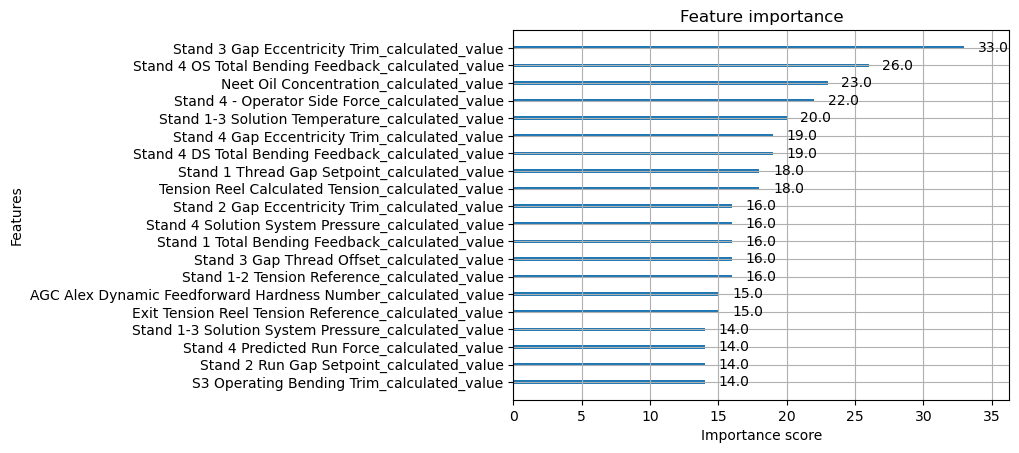

In [49]:
xgb.plot_importance(clf1,max_num_features=20)

# Classification Top - 20

In [28]:
X = df_filtered[['Neet Oil Concentration_calculated_value',
'Stand 4 DS Total Bending Feedback_calculated_value',
'Stand 4 OS Total Bending Feedback_calculated_value',
'Stand 3 Gap Eccentricity Trim_calculated_value',
'Stand 4 Top Current Feedback_calculated_value',
'Stand 2 Gap Eccentricity Trim_calculated_value',
'Stand 4 Gap Eccentricity Trim_calculated_value',
'X4 Gauge Deviation_calculated_value',
'Stand 3 Gap Thread Offset_calculated_value',
'Stand 2 Predicted Run Force_calculated_value',
'X0 Gauge Deviation_calculated_value',
'Stand 1-3 Solution Temperature_calculated_value',
'Stand 4 Predicted Run Force_calculated_value',
'Stand 4 - Operator Side Force_calculated_value',
'AGC Alex Dynamic Feedforward Hardness Number_calculated_value',
'Stand 1-3 Solution System Pressure_calculated_value',
'Stand 1 Thread Gap Setpoint_calculated_value',
'Stand 2 Gap Thread Offset_calculated_value',
'Stand 2 Total Bending Feedback_calculated_value',
'Stand 1-2 Tension Reference_calculated_value']]
y = df_filtered['class_string']

# Encode y (because it's a string like "HHLHL"), use sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split train/test (70/30 split, random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [29]:
# XGBoost can handle multiclass natively
clf = XGBClassifier(
    n_estimators=113,
    max_depth=3,
    learning_rate=0.13312820438128978,
    subsample=0.9173953855049505,
    colsample_bytree=0.6093189324139895,
    gamma=0.780254120577378,
    reg_alpha=0.6574622292293312,   # alpha → reg_alpha
    reg_lambda=4.418421467097197,   # lambda → reg_lambda
    random_state=42,
    eval_metric='mlogloss'          # Reproducibility
)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6093189324139895, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=0.780254120577378, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13312820438128978,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=113, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
# Predict
y_pred = clf.predict(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

# Optional: Show full classification report for all classes
print("\nClassification report taking top 20 features:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy:  0.829
Precision: 0.761
Recall:    0.829
F1 Score:  0.762

Classification report taking top 20 features:

              precision    recall  f1-score   support

       HLLHL       0.00      0.00      0.00         6
       HLLLH       0.00      0.00      0.00        13
       HLLLL       0.89      0.11      0.19        76
       LHLLL       0.00      0.00      0.00        10
       LLHLL       0.00      0.00      0.00         9
       LLLHL       0.00      0.00      0.00        16
       LLLLH       0.00      0.00      0.00        24
       LLLLL       0.83      1.00      0.91       716

    accuracy                           0.83       870
   macro avg       0.21      0.14      0.14       870
weighted avg       0.76      0.83      0.76       870



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Hyperparameter Tuning

In [13]:
import optuna
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import log_loss

In [14]:
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [15]:
def objective(trial):
    params = {
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'num_class': len(np.unique(y_train)),
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('alpha', 0, 5),
        'reg_lambda': trial.suggest_float('lambda', 0, 5),
        'random_state': 42,
        'tree_method': 'hist'
    }

    model = XGBClassifier(**params)
    model.fit(X_subtrain, y_subtrain,
              eval_set=[(X_valid, y_valid)],
              verbose=False)

    y_pred = model.predict_proba(X_valid)
    return log_loss(y_valid, y_pred)

In [17]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, timeout=1800) 

print("Best hyperparameters:")
print(study.best_params)

[I 2025-07-29 15:11:33,588] A new study created in memory with name: no-name-cb7aa49d-e9ce-4a02-8c6f-f2c81c4b5b63
[I 2025-07-29 15:11:34,982] Trial 0 finished with value: 0.6733331283509443 and parameters: {'n_estimators': 142, 'max_depth': 7, 'learning_rate': 0.13705630879308017, 'subsample': 0.7386316297175359, 'colsample_bytree': 0.9144796876729921, 'gamma': 4.073501449877906, 'alpha': 4.0795236417666185, 'lambda': 1.67796843527706}. Best is trial 0 with value: 0.6733331283509443.
[I 2025-07-29 15:11:37,210] Trial 1 finished with value: 0.5889177304443299 and parameters: {'n_estimators': 158, 'max_depth': 9, 'learning_rate': 0.12178054363801973, 'subsample': 0.7769059018487243, 'colsample_bytree': 0.6025508541367023, 'gamma': 1.7775061910258239, 'alpha': 0.08754692943271691, 'lambda': 2.348161041731276}. Best is trial 1 with value: 0.5889177304443299.
[I 2025-07-29 15:11:39,049] Trial 2 finished with value: 0.7011975569970891 and parameters: {'n_estimators': 180, 'max_depth': 9, 'le

Best hyperparameters:
{'n_estimators': 113, 'max_depth': 3, 'learning_rate': 0.13312820438128978, 'subsample': 0.9173953855049505, 'colsample_bytree': 0.6093189324139895, 'gamma': 0.780254120577378, 'alpha': 0.6574622292293312, 'lambda': 4.418421467097197}


In [ ]:
pip install --upgrade xgboost

## Confusion Matrix

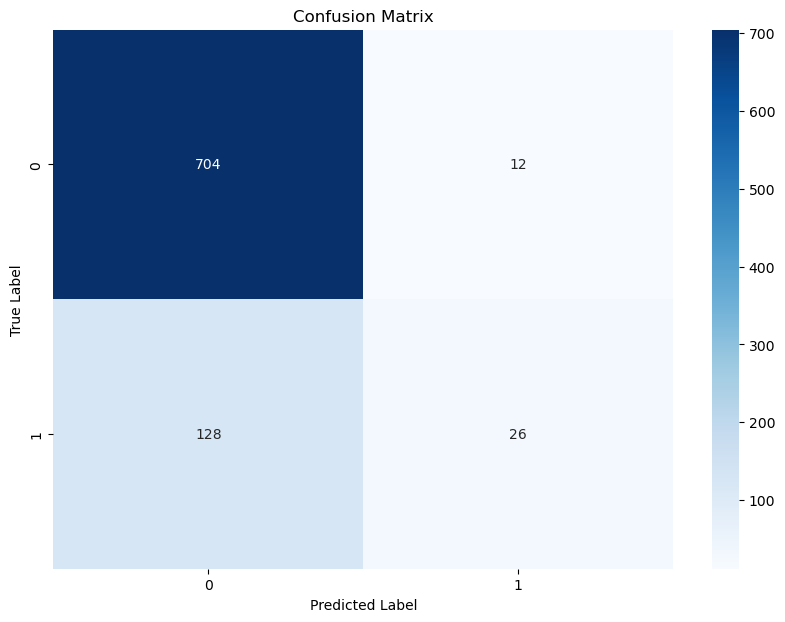

Correctly classified samples per class:
{0: np.int64(704), 1: np.int64(26)}


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: True labels and predictions (replace with your own lists)
# y_true = [...]  # actual labels
# y_pred = [...]  # predicted labels


# Step 2: Define all possible class labels in fixed order
class_labels = [0,1]

# Step 3: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

# Step 4: Create DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Step 5: Plot as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 6: Get correctly classified counts
correctly_classified = dict(zip(class_labels, cm.diagonal()))
print("Correctly classified samples per class:")
print(correctly_classified)